# CP318: DATA SCIENCE FOR SMART CITIES 
## Project 1 : Traffic Sign Prediction


 ## <span style='color:red'> <span style='font-family:Georgia'> TEAM KAMIKAZEEE </span>
### Naman Maheswari, Samarthya Tomar, Satish Nukala, Toshik Dhanurkar


#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Loading Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint
from keras.constraints import maxnorm
from keras.models import load_model
import seaborn as sns
from keras.layers import GlobalAveragePooling2D, Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")


## 1. Reading csv file into a pandas dataframe

In [2]:
df1 = pd.read_csv(r'C:\Users\My PC\Desktop\ML PROJECTS\Project1_Data\train_data.csv')

#### File train_data.csv contains about 932 images along with the class (label) column. Each row corresponds to a traffic sign image and a small number of other features, and the columns have a meaning as shown below:
| Column(s) | Name  | Meaning |
| --- | --- | :- |
| 0 | ID | An integer identifier which is unique within a file for each image. |
| 1 | Class | An integer identifier the traffic sign type. |
| 2-2501 |C1-C2500 |  Pixels of the 50 by 50 image stored in greyscale, with each pixel an integer value in range [0,255]. The image matrix has flattened into a vector


In [3]:
df1

,ID,Class,C1,C2,C3,C4,C5,C6,C7,C8,...,C2491,C2492,C2493,C2494,C2495,C2496,C2497,C2498,C2499,C2500
0,3999,4,253,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,253,253,253
1,2282,13,19,17,17,19,20,22,27,33,...,29,67,28,21,28,76,48,11,39,74
2,2086,26,216,217,219,221,224,226,228,229,...,214,214,213,213,213,212,212,212,213,213
3,3475,13,215,209,202,211,219,198,185,200,...,181,183,169,170,174,170,175,172,154,151
4,3526,23,251,252,253,253,253,253,253,253,...,252,251,255,247,239,245,254,253,252,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,3606,26,212,222,212,220,216,142,169,173,...,108,51,74,85,102,111,116,113,135,130
928,1478,3,188,112,167,183,177,181,178,180,...,163,171,129,51,160,113,56,135,133,133
929,1268,13,169,169,169,169,169,169,169,169,...,38,39,31,24,12,37,35,47,29,68
930,1409,21,253,253,253,253,254,253,253,253,...,76,76,76,74,70,75,77,76,70,185


In [4]:
df1.shape

(932, 2502)

### Copying and concatinating to get lager dataset

In [5]:
df2 = df1.copy(deep=True)

df = pd.concat([df1, df2], ignore_index=True)


In [6]:
df

,ID,Class,C1,C2,C3,C4,C5,C6,C7,C8,...,C2491,C2492,C2493,C2494,C2495,C2496,C2497,C2498,C2499,C2500
0,3999,4,253,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,253,253,253
1,2282,13,19,17,17,19,20,22,27,33,...,29,67,28,21,28,76,48,11,39,74
2,2086,26,216,217,219,221,224,226,228,229,...,214,214,213,213,213,212,212,212,213,213
3,3475,13,215,209,202,211,219,198,185,200,...,181,183,169,170,174,170,175,172,154,151
4,3526,23,251,252,253,253,253,253,253,253,...,252,251,255,247,239,245,254,253,252,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,3606,26,212,222,212,220,216,142,169,173,...,108,51,74,85,102,111,116,113,135,130
1860,1478,3,188,112,167,183,177,181,178,180,...,163,171,129,51,160,113,56,135,133,133
1861,1268,13,169,169,169,169,169,169,169,169,...,38,39,31,24,12,37,35,47,29,68
1862,1409,21,253,253,253,253,254,253,253,253,...,76,76,76,74,70,75,77,76,70,185


## 2. Data Preprocessing

### Checking for null values, if any, and eliminating them

In [7]:
df.isna().sum()

df.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=True)

df.isna().sum()

df.head(20)

,ID,Class,C1,C2,C3,C4,C5,C6,C7,C8,...,C2491,C2492,C2493,C2494,C2495,C2496,C2497,C2498,C2499,C2500
0,3999,4,253,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,253,253,253
1,2282,13,19,17,17,19,20,22,27,33,...,29,67,28,21,28,76,48,11,39,74
2,2086,26,216,217,219,221,224,226,228,229,...,214,214,213,213,213,212,212,212,213,213
3,3475,13,215,209,202,211,219,198,185,200,...,181,183,169,170,174,170,175,172,154,151
4,3526,23,251,252,253,253,253,253,253,253,...,252,251,255,247,239,245,254,253,252,249
5,3328,26,41,47,54,59,64,65,56,45,...,63,55,57,64,63,57,51,45,37,35
6,3013,22,253,253,253,253,253,253,253,253,...,241,242,243,241,240,242,249,222,222,250
7,3032,15,253,253,253,253,253,249,250,254,...,253,253,253,251,250,252,253,253,253,253
8,1681,26,189,202,195,188,190,190,191,193,...,58,51,132,36,86,82,40,78,179,76
9,1111,6,253,253,253,253,253,253,253,253,...,255,255,224,148,106,123,215,254,253,253


### Defining independent and Target variable

In [8]:
X = df.drop(['ID','Class'], axis = 1)  ##Idependent variable is a pixel value at a pixel location for a  image.

y = df["Class"]          ##Target variable is the class  to which image belongs.


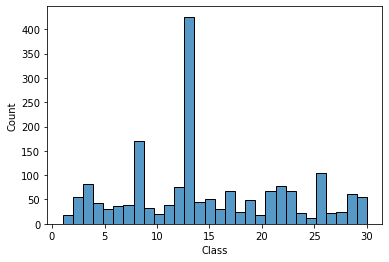

In [9]:
# HISTOGRAM

sns.histplot(x="Class", data = df, bins=30);


### We can see that our training set is unevenly distributed.

In [10]:
df.groupby('Class')['ID'].count()

Class
1      18
2      56
3      82
4      42
5      30
6      36
7      38
8     170
9      32
10     20
11     38
12     76
13    426
14     44
15     52
16     30
17     68
18     24
19     48
20     18
21     68
22     78
23     68
24     22
25     12
26    104
27     22
28     24
29     62
30     56
Name: ID, dtype: int64

 Class 13 has 426 training examples while class 25 has only 12 training examples. Our model will get trained highly on one class in comaprison to other. In other words, we will have biased model with unequal representation of all the classes. To tacle this problem we will have to resample our data.

### Oversampling

One such technique of resampling is Oversampling.
We will use imblearn library for this. For more information - [imblearn](https://imbalanced-learn.org/stable/over_sampling.html)

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'not majority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

4     426
13    426
9     426
11    426
1     426
14    426
18    426
10    426
24    426
27    426
3     426
21    426
19    426
20    426
30    426
28    426
8     426
7     426
5     426
17    426
12    426
25    426
2     426
29    426
6     426
15    426
22    426
23    426
26    426
16    426
Name: Class, dtype: int64

In [12]:
y_sm.shape

(12780,)

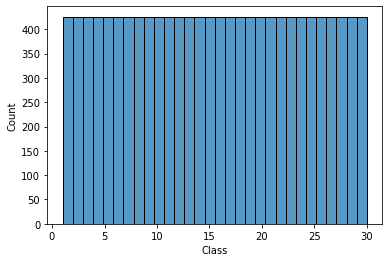

In [13]:
sns.histplot(x=y_sm, bins=30);

### Train-Test Split

In [14]:
# Using sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify = y_sm)

### Normalizing training and test data

In [15]:
X_train = X_train/255
X_test = X_test/255

In [16]:
X_train.shape

(10224, 2500)

### Reshaping data into image format

In [17]:
X_train = X_train.values.reshape(10224,50,50,1)

In [18]:
X_test.shape

(2556, 2500)

In [19]:
X_test = X_test.values.reshape(2556,50,50,1)

## 3. Model Training - CNN

In [20]:
from tensorflow.keras.utils import to_categorical  ## This will convert our target variable into one hot vector.

y_cat_train = to_categorical(y_train, )

y_cat_test = to_categorical(y_test,)

In [21]:
print(y_train.shape)
print(y_cat_test.shape)

(10224,)
(2556, 31)


#### Importing Tensorflow libraries

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import tensorflow as tf
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.losses import MeanSquaredError

### CNN MODEL

In [23]:
    model = Sequential()
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu', input_shape = (50,50,1)))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters =128,kernel_size = (2,2),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.20))
    
    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(31, activation = "softmax"))



    model.compile(optimizer = 'adam' , loss="categorical_crossentropy", metrics=["accuracy"])



    learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                                patience=3, 
                                                verbose=1, 
                                                factor=0.5, 
                                                min_lr=0.00001)
    
    epochs = 13
    batch_size = 35
    

    

### Data Augmentation - Synthetically generating new data

In [24]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

### Model Fitting

In [25]:
history = model.fit_generator(datagen.flow(X_train,y_cat_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_cat_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/13
292/292 - 73s - loss: 2.7154 - accuracy: 0.2406 - val_loss: 1.0955 - val_accuracy: 0.7144 - lr: 0.0010 - 73s/epoch - 249ms/step
Epoch 2/13
292/292 - 77s - loss: 1.2866 - accuracy: 0.6159 - val_loss: 0.4207 - val_accuracy: 0.8932 - lr: 0.0010 - 77s/epoch - 263ms/step
Epoch 3/13
292/292 - 79s - loss: 0.8342 - accuracy: 0.7484 - val_loss: 0.2141 - val_accuracy: 0.9546 - lr: 0.0010 - 79s/epoch - 272ms/step
Epoch 4/13
292/292 - 80s - loss: 0.6080 - accuracy: 0.8140 - val_loss: 0.1176 - val_accuracy: 0.9687 - lr: 0.0010 - 80s/epoch - 275ms/step
Epoch 5/13
292/292 - 81s - loss: 0.5021 - accuracy: 0.8456 - val_loss: 0.0783 - val_accuracy: 0.9828 - lr: 0.0010 - 81s/epoch - 277ms/step
Epoch 6/13
292/292 - 85s - loss: 0.4158 - accuracy: 0.8679 - val_loss: 0.0722 - val_accuracy: 0.9800 - lr: 0.0010 - 85s/epoch - 293ms/step
Epoch 7/13
292/292 - 96s - loss: 0.3515 - accuracy: 0.8888 - val_loss: 0.0387 - val_accuracy: 0.9883 - lr: 0.0010 - 96s/epoch - 330ms/step
Epoch 8/13
292/292 - 107s -

### Loss and Accuracy

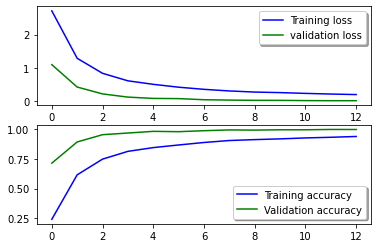

In [26]:
# Plot the loss and accuracy curves for training and validation 

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='g', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)


ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='g',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


## 4 Prediction on CNN Model

In [27]:
df_pred = pd.read_csv(r'C:\Users\My PC\Desktop\ML PROJECTS\Project1_Data\test_data.csv')
df_pred

,ID,Class,C1,C2,C3,C4,C5,C6,C7,C8,...,C2491,C2492,C2493,C2494,C2495,C2496,C2497,C2498,C2499,C2500
0,1869,0,253,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,253,253,253
1,2221,0,74,60,58,71,61,66,88,71,...,128,127,125,81,69,87,124,115,118,118
2,3971,0,211,210,209,208,207,207,207,207,...,200,202,148,151,120,90,111,141,110,111
3,1309,0,253,253,253,253,253,253,253,253,...,171,119,116,117,116,117,117,117,115,222
4,2442,0,134,96,77,110,75,110,144,120,...,44,55,50,40,45,48,46,48,49,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1036,0,240,235,231,224,199,160,138,139,...,104,131,106,113,141,153,182,168,123,82
396,3651,0,253,253,253,253,253,253,253,253,...,252,252,252,253,254,253,252,250,250,253
397,3000,0,66,67,67,69,70,71,72,72,...,36,43,70,83,82,61,90,98,103,103
398,2518,0,253,253,253,253,253,253,253,253,...,253,253,253,254,218,215,254,255,255,253


In [28]:
test_data = df_pred.iloc[:,2:].values.reshape(400,50,50,1)
test_data = test_data/255
test_data

array([[[[0.99215686],
         [0.99215686],
         [0.99215686],
         ...,
         [0.99215686],
         [0.99215686],
         [0.99215686]],

        [[0.99215686],
         [0.99215686],
         [0.99215686],
         ...,
         [0.99215686],
         [0.99215686],
         [0.99215686]],

        [[0.99215686],
         [0.99215686],
         [0.99215686],
         ...,
         [0.99215686],
         [0.99215686],
         [0.99215686]],

        ...,

        [[0.99215686],
         [0.99215686],
         [0.99215686],
         ...,
         [0.99215686],
         [0.99215686],
         [0.99215686]],

        [[0.99215686],
         [0.99215686],
         [0.99215686],
         ...,
         [0.99215686],
         [0.99215686],
         [0.99215686]],

        [[0.99215686],
         [0.99215686],
         [0.99215686],
         ...,
         [0.99215686],
         [0.99215686],
         [0.99215686]]],


       [[[0.29019608],
         [0.23529412],
         [0.22

In [29]:
predict_x = model.predict(test_data) 
classes_x = np.argmax(predict_x,axis=1)

13/13 [==============================] - 1s 52ms/step


In [30]:
df_pred['Class'] = classes_x

In [31]:
df_pred_cnn = df_pred[['ID','Class']]

In [32]:
df_pred_cnn['Class'] = df_pred_cnn['Class'] 
df_pred_cnn

,ID,Class
0,1869,2
1,2221,13
2,3971,19
3,1309,2
4,2442,13
...,...,...
395,1036,8
396,3651,25
397,3000,8
398,2518,3


In [33]:
df_pred_cnn.to_csv(r'C:\Users\My PC\Desktop\ML PROJECTS\Project1_Data\CNN.csv')

## 5 Model Training - SVM

In [34]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [35]:
df

,ID,Class,C1,C2,C3,C4,C5,C6,C7,C8,...,C2491,C2492,C2493,C2494,C2495,C2496,C2497,C2498,C2499,C2500
0,3999,4,253,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,253,253,253
1,2282,13,19,17,17,19,20,22,27,33,...,29,67,28,21,28,76,48,11,39,74
2,2086,26,216,217,219,221,224,226,228,229,...,214,214,213,213,213,212,212,212,213,213
3,3475,13,215,209,202,211,219,198,185,200,...,181,183,169,170,174,170,175,172,154,151
4,3526,23,251,252,253,253,253,253,253,253,...,252,251,255,247,239,245,254,253,252,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,3606,26,212,222,212,220,216,142,169,173,...,108,51,74,85,102,111,116,113,135,130
1860,1478,3,188,112,167,183,177,181,178,180,...,163,171,129,51,160,113,56,135,133,133
1861,1268,13,169,169,169,169,169,169,169,169,...,38,39,31,24,12,37,35,47,29,68
1862,1409,21,253,253,253,253,254,253,253,253,...,76,76,76,74,70,75,77,76,70,185


In [36]:
# Using sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify = y_sm)
X_train = X_train/255
X_test = X_test/255

### Define a pipeline

In [37]:
pipe = Pipeline([('scaler',StandardScaler()), ('svc', SVC(kernel = 'rbf', C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

1.0

In [38]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00        85
           3       1.00      1.00      1.00        85
           4       1.00      1.00      1.00        85
           5       1.00      1.00      1.00        85
           6       1.00      1.00      1.00        86
           7       1.00      1.00      1.00        85
           8       1.00      1.00      1.00        85
           9       1.00      1.00      1.00        86
          10       1.00      1.00      1.00        85
          11       1.00      1.00      1.00        85
          12       1.00      1.00      1.00        85
          13       1.00      1.00      1.00        86
          14       1.00      1.00      1.00        85
          15       1.00      1.00      1.00        85
          16       1.00      1.00      1.00        85
          17       1.00      1.00      1.00        85
          18       1.00    

### Grid Search CV - To find out best model and best parameters on basis of training set

In [39]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [40]:
##GRID SEARCH CV

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

### Result on Test Set

In [ ]:
best_estimators['svm'].score(X_test,y_test)

In [ ]:
best_estimators['random_forest'].score(X_test,y_test)

In [ ]:
best_estimators['logistic_regression'].score(X_test,y_test)

#### Hence we will choose SVM with {'svc__C': 10, 'svc__kernel': 'rbf'}

## 6 Training on entire dataset and prediction on required dataset

In [42]:
import seaborn as sn
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
df 

,ID,Class,C1,C2,C3,C4,C5,C6,C7,C8,...,C2491,C2492,C2493,C2494,C2495,C2496,C2497,C2498,C2499,C2500
0,3999,4,253,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,253,253,253
1,2282,13,19,17,17,19,20,22,27,33,...,29,67,28,21,28,76,48,11,39,74
2,2086,26,216,217,219,221,224,226,228,229,...,214,214,213,213,213,212,212,212,213,213
3,3475,13,215,209,202,211,219,198,185,200,...,181,183,169,170,174,170,175,172,154,151
4,3526,23,251,252,253,253,253,253,253,253,...,252,251,255,247,239,245,254,253,252,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,3606,26,212,222,212,220,216,142,169,173,...,108,51,74,85,102,111,116,113,135,130
1860,1478,3,188,112,167,183,177,181,178,180,...,163,171,129,51,160,113,56,135,133,133
1861,1268,13,169,169,169,169,169,169,169,169,...,38,39,31,24,12,37,35,47,29,68
1862,1409,21,253,253,253,253,254,253,253,253,...,76,76,76,74,70,75,77,76,70,185


In [45]:
X = df.drop(['ID','Class'], axis = 1)  ##Idependent variable is a pixel value at a pixel location for a  image.

y = df["Class"]          ##Target variable is the class  to which image belongs.

X = X/255

In [46]:
df_pred = pd.read_csv(r'C:\Users\My PC\Desktop\ML PROJECTS\Project1_Data\test_data.csv')
df_pred

,ID,Class,C1,C2,C3,C4,C5,C6,C7,C8,...,C2491,C2492,C2493,C2494,C2495,C2496,C2497,C2498,C2499,C2500
0,1869,0,253,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,253,253,253
1,2221,0,74,60,58,71,61,66,88,71,...,128,127,125,81,69,87,124,115,118,118
2,3971,0,211,210,209,208,207,207,207,207,...,200,202,148,151,120,90,111,141,110,111
3,1309,0,253,253,253,253,253,253,253,253,...,171,119,116,117,116,117,117,117,115,222
4,2442,0,134,96,77,110,75,110,144,120,...,44,55,50,40,45,48,46,48,49,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1036,0,240,235,231,224,199,160,138,139,...,104,131,106,113,141,153,182,168,123,82
396,3651,0,253,253,253,253,253,253,253,253,...,252,252,252,253,254,253,252,250,250,253
397,3000,0,66,67,67,69,70,71,72,72,...,36,43,70,83,82,61,90,98,103,103
398,2518,0,253,253,253,253,253,253,253,253,...,253,253,253,254,218,215,254,255,255,253


In [47]:
X_predict = df_pred.iloc[:,2:]
X_predict = X_predict/255
X_predict

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C2491,C2492,C2493,C2494,C2495,C2496,C2497,C2498,C2499,C2500
0,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157
1,0.290196,0.235294,0.227451,0.278431,0.239216,0.258824,0.345098,0.278431,0.356863,0.333333,...,0.501961,0.498039,0.490196,0.317647,0.270588,0.341176,0.486275,0.450980,0.462745,0.462745
2,0.827451,0.823529,0.819608,0.815686,0.811765,0.811765,0.811765,0.811765,0.819608,0.819608,...,0.784314,0.792157,0.580392,0.592157,0.470588,0.352941,0.435294,0.552941,0.431373,0.435294
3,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.670588,0.466667,0.454902,0.458824,0.454902,0.458824,0.458824,0.458824,0.450980,0.870588
4,0.525490,0.376471,0.301961,0.431373,0.294118,0.431373,0.564706,0.470588,0.356863,0.360784,...,0.172549,0.215686,0.196078,0.156863,0.176471,0.188235,0.180392,0.188235,0.192157,0.207843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.941176,0.921569,0.905882,0.878431,0.780392,0.627451,0.541176,0.545098,0.552941,0.564706,...,0.407843,0.513725,0.415686,0.443137,0.552941,0.600000,0.713725,0.658824,0.482353,0.321569
396,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.988235,0.988235,0.988235,0.992157,0.996078,0.992157,0.988235,0.980392,0.980392,0.992157
397,0.258824,0.262745,0.262745,0.270588,0.274510,0.278431,0.282353,0.282353,0.286275,0.290196,...,0.141176,0.168627,0.274510,0.325490,0.321569,0.239216,0.352941,0.384314,0.403922,0.403922
398,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.992157,0.992157,0.992157,0.996078,0.854902,0.843137,0.996078,1.000000,1.000000,0.992157


In [ ]:
from sklearn import svm


classifier = svm.SVC(kernel='rbf',gamma='auto', C=10)
classifier.fit(X, y)
y_predict = classifier.predict(X_predict)

In [ ]:
classes_x = y_predict.reshape(400,1)

In [ ]:
df_pred['Class'] = classes_x
df_pred_svm = df_pred[['ID','Class']]
df_pred_svm

In [ ]:
df4.to_csv(r'C:\Users\My PC\Desktop\ML PROJECTS\Project1_Data\svm.csv')

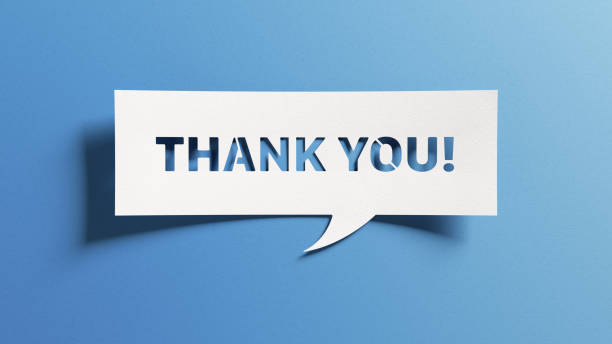